In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pandas as pd

In [2]:
data = pd.read_csv('position_salaries.csv')

In [3]:
x = data.iloc[:, 1:2].values
y = data.iloc[:,2].values

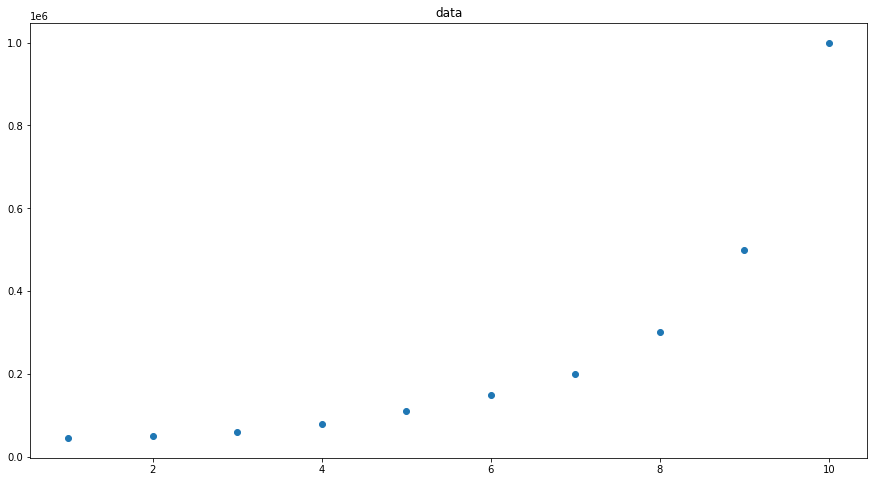

In [4]:
plt.figure(figsize = (15,8))
plt.plot(x, y, 'o')
plt.title("data")
plt.show()


In [5]:
m = x.shape[0]
x = np.hstack((np.ones((m, 1)), x))
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
n = int(input()) #taking the degree of polynomial
i = 2

2


In [7]:
while i <= n:# creating new extra features which are powers of the original feature 
        x = np.hstack((x, (x[:, 1] ** (i)).reshape((m, 1))))
        i = i + 1

In [8]:
mu = np.mean(x[:, 1:], axis=0)
sigma = np.std(x[:, 1:], axis=0)
x[:, 1:] = (x[:, 1:] - np.mean(x[:, 1:], axis=0)) / np.std(x[:, 1:], axis=0)
mu

array([ 5.5, 38.5])

In [9]:
alpha = 0.05#standard value for alpha
theta = np.random.random(x.shape[1])#random initial value for  theta
def J(theta, x, y):  #error function
  return np.mean(np.square((x@theta.T) - y))


In [10]:
err_old = J(theta, x, y)              #initialising the required variables
m_old = 1* (x.T @ ((x @ theta) - y))
theta = theta - alpha * (1/m) *m_old

In [11]:
m_new = m_old
err_new = J(theta, x, y)

In [12]:
ep = err_new*(0.0001)

In [13]:
k = 0#k is k is indicator wether error is minimised or not
while k != 1:
    m_new = 0.9* (x.T @ ((x @ theta) - y))+0.1*m_old  #gradient descent with momentum
    theta = theta - alpha * m_new
    m_old = m_new
    err_new = J(theta, x, y)
    if abs(err_new-err_old) <= mu[0]*(10**(-3)):   #1  
        k = 1
    err_old = err_new

In [14]:
expected = x@theta

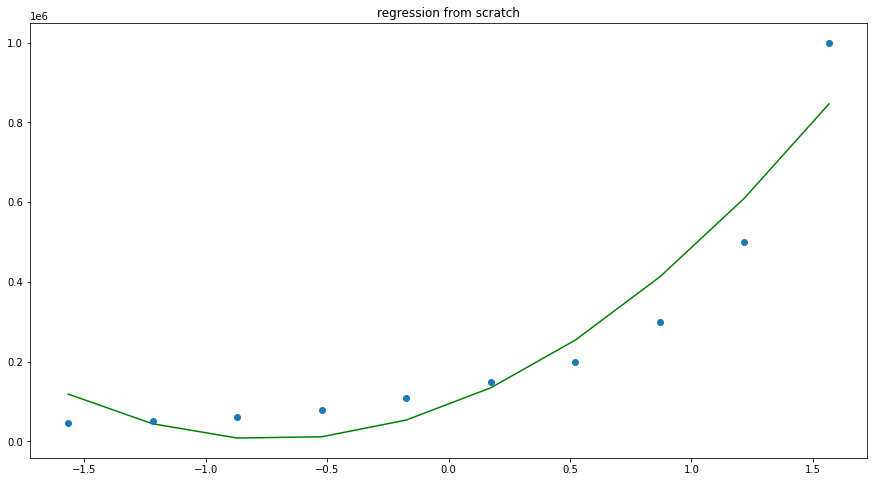

In [15]:
plt.figure(figsize = (15,8))
plt.title("regression from scratch")
plt.plot(x[:, 1], expected, color = 'green')
plt.plot(x[:, 1], y , 'o')
#plt.plot(x[:, 1], expected, color = 'green')
plt.show()

In [16]:
Polyreg = LinearRegression()
Polyreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

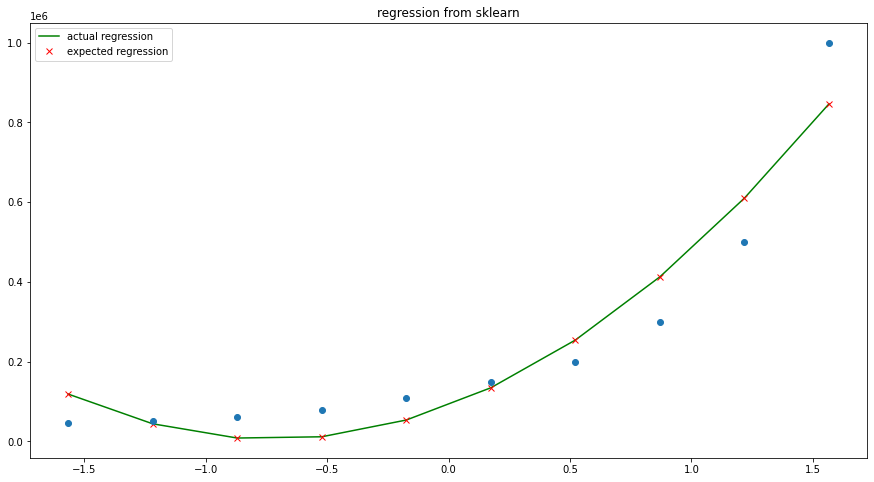

In [17]:
plt.figure(figsize = (15,8))
plt.title("regression from sklearn")
plt.plot(x[:, 1], Polyreg.predict(x), color = 'green', label = 'actual regression')
plt.plot(x[:, 1], expected, 'rx', label = 'expected regression')
plt.plot(x[:, 1], y, 'o')
plt.legend()
plt.show()
#you can see wether 'x' lies on regression line or not

#####

### 